In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
seq = np.arange(10, 100, 10)

In [3]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_idx = i + n_steps
        if end_idx > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [4]:
X, y = split_sequence(seq, 3)

In [5]:
n_features = 1

In [6]:
X = X.reshape(X.shape[0], X.shape[1], -1)

# Vanilla LSTM

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Input

In [8]:
inputs = Input(shape = (X.shape[1], n_features))
x = LSTM(50, activation='relu')(inputs)
x = Dense(1)(x)
model = Model(inputs, x)

In [9]:
model.compile(loss='mse', optimizer='adam')

In [10]:
hist = model.fit(X, y, epochs = 200, verbose=0)

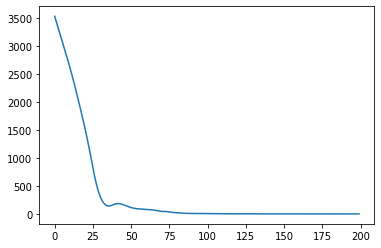

In [11]:
plt.plot(hist.history['loss'])

In [12]:
x_input = np.array([70, 80, 90])
x_input = x_input.reshape(1, 3, 1)

In [13]:
yhat = model.predict(x_input, verbose=0)

In [14]:
yhat

array([[102.16954]], dtype=float32)

## Stacked LSTM

In [15]:
inputs = Input(shape = (X.shape[1], X.shape[2]))
l = LSTM(50, activation='relu', return_sequences=True)(inputs)
l = LSTM(50, activation='relu')(l)
l = Dense(1)(l)
model = Model(inputs, l)

In [16]:
model.compile(loss='mse', optimizer='adam')

In [17]:
hist = model.fit(X, y, epochs = 200, verbose=0)

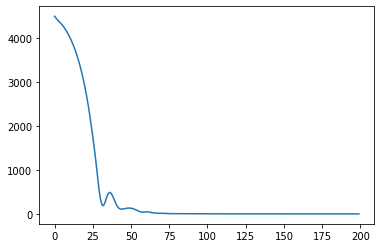

In [18]:
plt.plot(hist.history['loss'])

In [19]:
x_input = np.array([70, 80, 90])
x_input = x_input.reshape((1, X.shape[1], X.shape[2]))

In [20]:
yhat = model.predict(x_input, verbose=0)

In [21]:
yhat

array([[102.38639]], dtype=float32)

## Bidirectional LSTM

In [22]:
from tensorflow.keras.layers import Bidirectional

In [46]:
inputs = Input(shape = (X.shape[1], X.shape[2]))
b = Bidirectional(LSTM(50, activation='relu'))(inputs)
b = Dense(1)(b)
model = Model(inputs, b)

In [53]:
model.compile(optimizer='adam', loss='mse')

In [54]:
hist = model.fit(X, y, epochs=200, verbose=0)

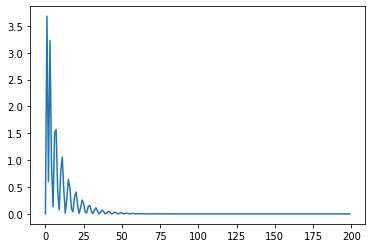

In [55]:
plt.plot(hist.history['loss'])

In [56]:
x_input = np.array([70, 80, 90])
x_input = x_input.reshape((1, X.shape[1], X.shape[2]))

In [59]:
yhat = model.predict(x_input, verbose=0)

In [60]:
yhat

array([[100.311966]], dtype=float32)

# CNN-LSTM

In [61]:
seq = np.arange(10, 100, 10)

In [63]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_idx = i + n_steps
        if end_idx > len(sequence)-1:
            break
        seq_x , seq_y = sequence[i:end_idx], sequence[end_idx]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [64]:
n_steps = 4
X, y = split_sequence(seq, n_steps)
n_features = 1
n_seq = 2
n_steps = 2

In [65]:
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))

In [71]:
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D, Flatten

In [73]:
inputs = Input(shape=(None, n_steps, n_features))
c = TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'))(inputs)
c = TimeDistributed(MaxPooling1D(pool_size=2))(c)
c = TimeDistributed(Flatten())(c)
l = LSTM(50, activation='relu')(c)
l = Dense(1)(l)
model = Model(inputs, l)

In [74]:
model.summary()

Model: "functional_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, None, 2, 1)]      0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 2, 64)       128       
_________________________________________________________________
time_distributed_4 (TimeDist (None, None, 1, 64)       0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, None, 64)          0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                23000     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 23,179
Trainable params: 23,179
Non-trainable params: 0
_________________________________________________

In [75]:
model.compile(loss='mse', optimizer='adam')

In [76]:
hist = model.fit(X, y, epochs=500, verbose=0)

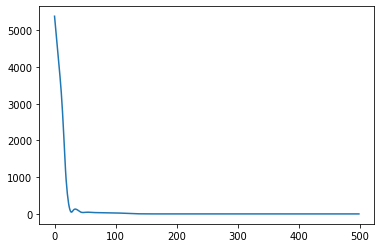

In [77]:
plt.plot(hist.history['loss'])

In [79]:
x_input = np.array([60, 70, 80, 90])
x_input = x_input.reshape(1, 2, 2, -1)

In [81]:
model.predict(x_input, verbose=0)

array([[100.365456]], dtype=float32)

# ConvLSTM

In [83]:
print(n_seq, n_steps, n_features)

2 2 1


In [92]:
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))

In [93]:
from tensorflow.keras.layers import ConvLSTM2D

In [94]:
inputs = Input(shape=(n_seq, 1, n_steps, n_features))
c = ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu')(inputs)
c = Flatten()(c)
c = Dense(1)(c)
model = Model(inputs, c)

In [95]:
model.summary()

Model: "functional_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 2, 1, 2, 1)]      0         
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, 1, 1, 64)          33536     
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 33,601
Trainable params: 33,601
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.compile(optimizer='adam', loss='mse')

In [97]:
hist = model.fit(X, y, epochs = 500, verbose=0)

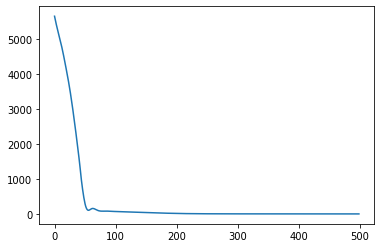

In [98]:
plt.plot(hist.history['loss'])

In [101]:
x_input = np.array([60,70,80,90])
x_input = x_input.reshape(1, 2, 1, 2, 1)

In [103]:
yhat = model.predict(x_input, verbose=0)

In [104]:
yhat

array([[102.431496]], dtype=float32)

# Multivariate LSTM Models

In [105]:
in_seq1 = np.arange(10, 100, 10)
in_seq2 = np.arange(15, 100, 10)
out_seq = np.array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

In [106]:
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

In [107]:
dataset = np.hstack((in_seq1, in_seq2, out_seq))

In [110]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_idx = i + n_steps
        if end_idx > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_idx, :-1], sequences[end_idx-1, -1]
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)

In [111]:
X, y = split_sequences(dataset, 3)

In [112]:
for i in range(len(X)):
    print(X[i], y[i])

[[10 15]
 [20 25]
 [30 35]] 65
[[20 25]
 [30 35]
 [40 45]] 85
[[30 35]
 [40 45]
 [50 55]] 105
[[40 45]
 [50 55]
 [60 65]] 125
[[50 55]
 [60 65]
 [70 75]] 145
[[60 65]
 [70 75]
 [80 85]] 165
[[70 75]
 [80 85]
 [90 95]] 185


In [123]:
n_steps, n_features = 3, X.shape[2]

In [124]:
inputs = Input(shape=(n_steps, n_features))
l = LSTM(50, activation='relu')(inputs)
l = Dense(1)(l)
model = Model(inputs, l)

In [128]:
model.compile(loss='mse', optimizer='adam')

In [129]:
hist=  model.fit(X, y, epochs = 200, verbose=0)

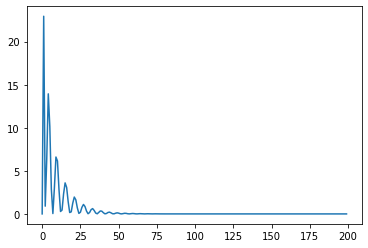

In [130]:
plt.plot(hist.history['loss'])

In [131]:
x_input = np.array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, X.shape[1], X.shape[2]))

In [133]:
model.predict(x_input, verbose=0)

array([[205.4602]], dtype=float32)